# Assingment - 11 Decision Tree

# 1) Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

About the data: Let’s consider a Company dataset with around 10 variables and 400 records.

The attributes are as follows:

*  Sales -- Unit sales (in thousands) at each location
*  Competitor Price -- Price charged by competitor at each location
*  Income -- Community income level (in thousands of dollars)
*  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
*  Population -- Population size in region (in thousands)
*  Price -- Price company charges for car seats at each site
*  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
*  Age -- Average age of the local population
*  Education -- Education level at each location
*  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
*  US -- A factor with levels No and Yes to indicate whether the store is in the US or not

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix


import warnings 
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
company_data = pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\Excelr.dataset\\Company_Data.csv")
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [3]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


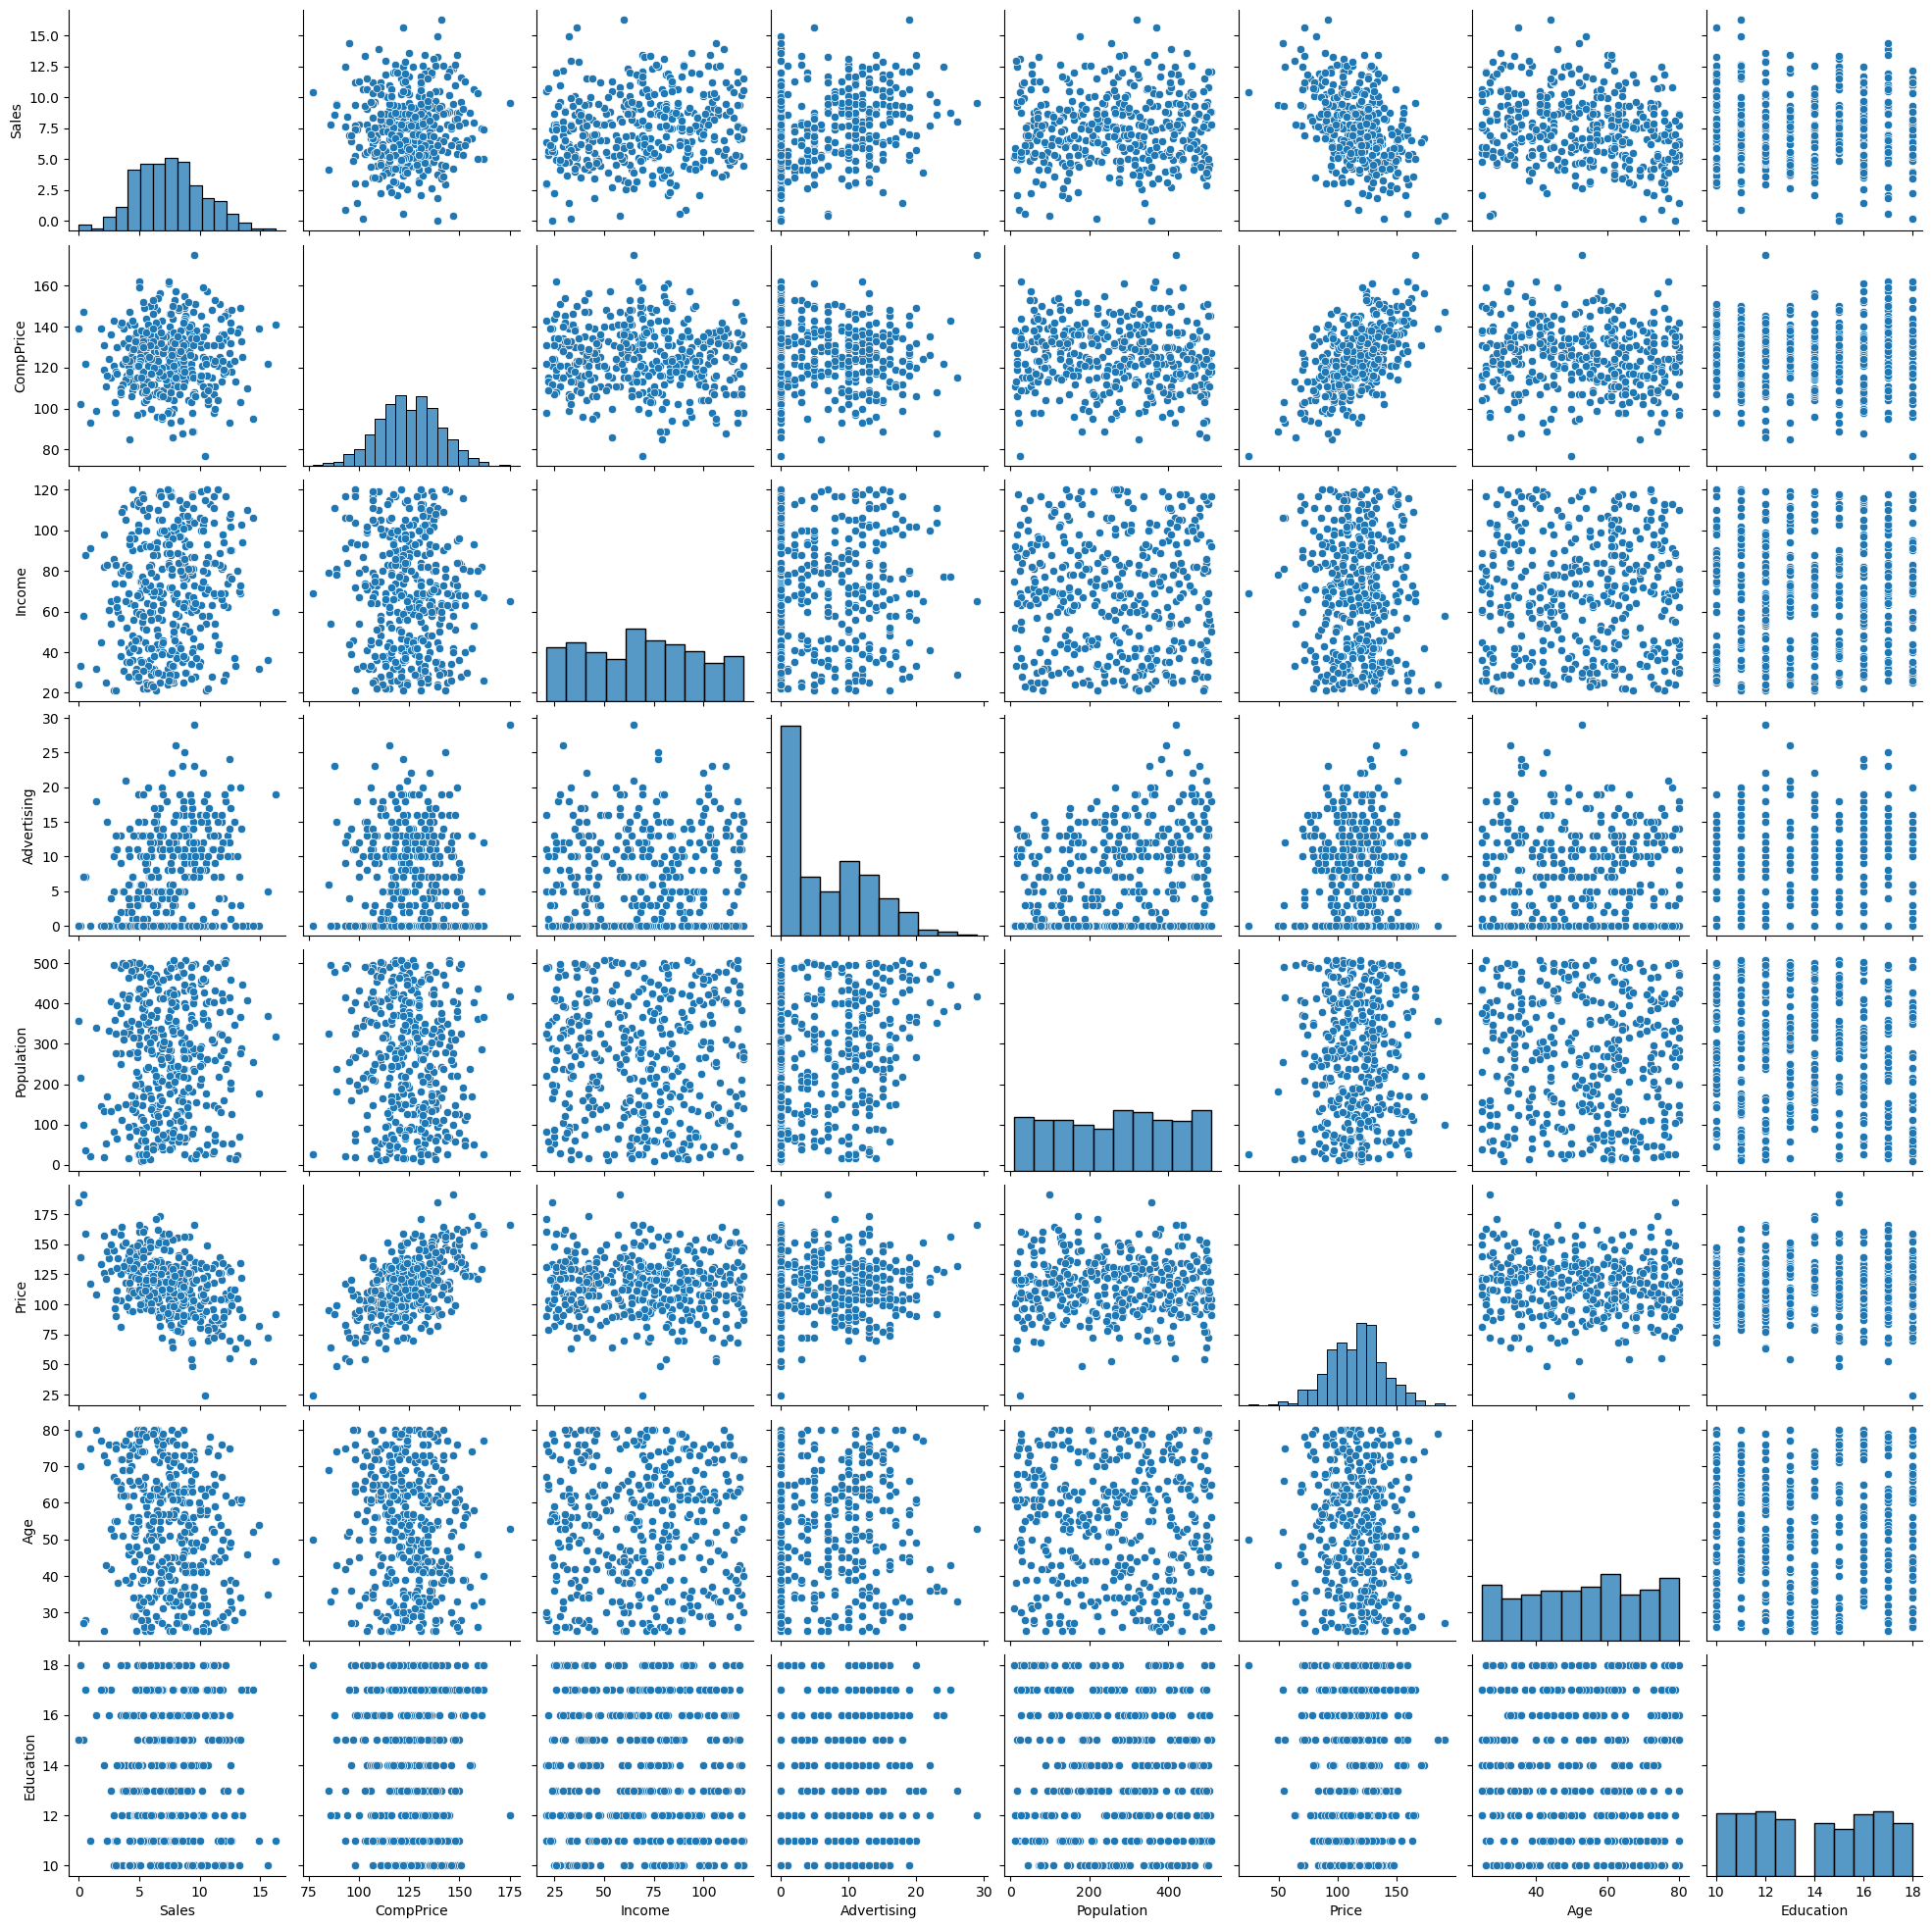

In [6]:
sns.pairplot(company_data)

In [7]:
# Correlation analysis for company_data
corr = company_data.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


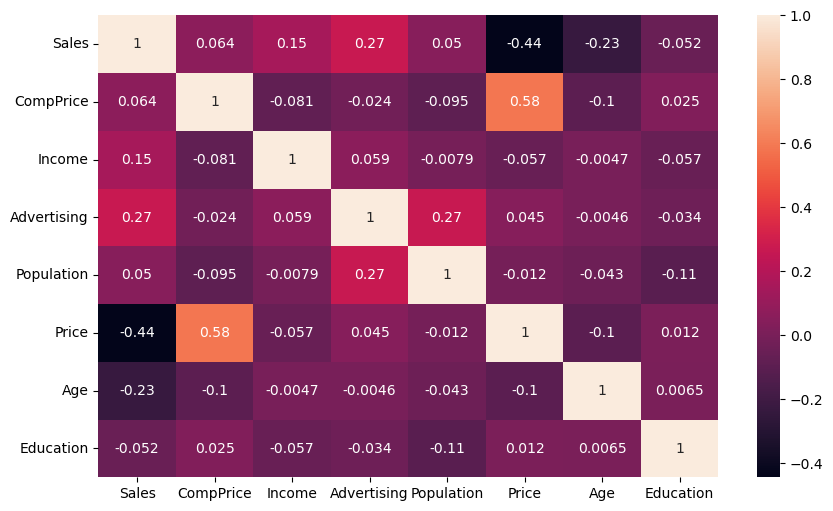

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

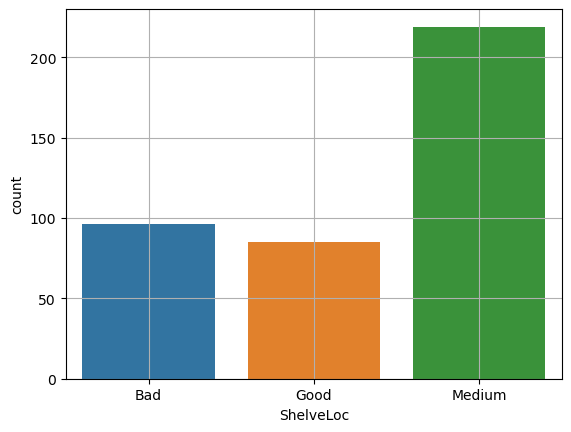

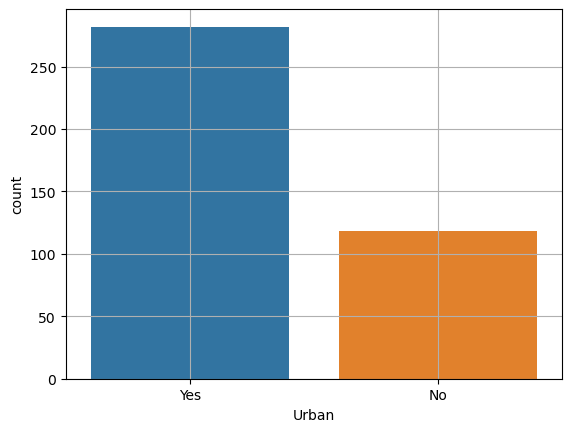

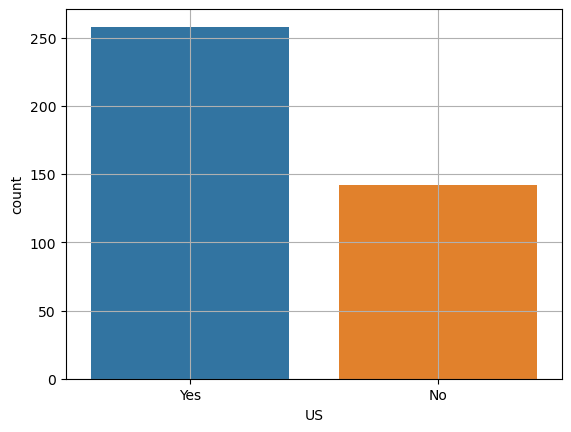

In [9]:
#count plot
sns.countplot(company_data['ShelveLoc'])
plt.grid(True)
plt.show()

sns.countplot(company_data['Urban'])
plt.grid(True)
plt.show()

sns.countplot(company_data['US'])
plt.grid(True)
plt.show()

In [10]:
#Converting Target variable 'Sales' into categories Low, Medium and High.
company_data['Sales'] = pd.cut(x=company_data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
company_data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

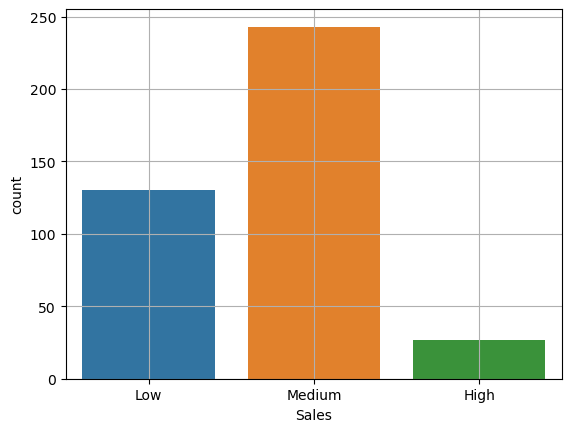

In [11]:
sns.countplot(company_data['Sales'])
plt.grid(True)
plt.show()

In [12]:
company_data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [14]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [15]:
#encoding categorical company_data
label_encoder = preprocessing.LabelEncoder()

company_data['Sales'] = label_encoder.fit_transform(company_data['Sales'])
company_data['ShelveLoc'] = label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = label_encoder.fit_transform(company_data['Urban'])
company_data['US'] = label_encoder.fit_transform(company_data['US'])

company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [16]:
# Input and Output variables
X = company_data.drop('Sales', axis = 1)
y = company_data[['Sales']]

In [17]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [18]:
print('x_train_shape :',x_train.shape ,'\n y_train_shape :',y_train.shape)

x_train_shape : (268, 10) 
 y_train_shape : (268, 1)


# Building model by entropy Criterion

In [19]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

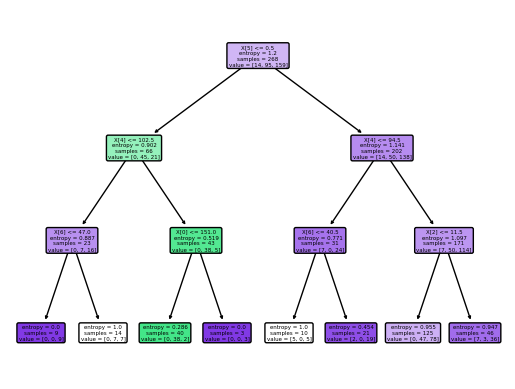

In [20]:
# Plotting Decision tree
tree.plot_tree(model_entropy,filled=True, rounded=True)
plt.show()

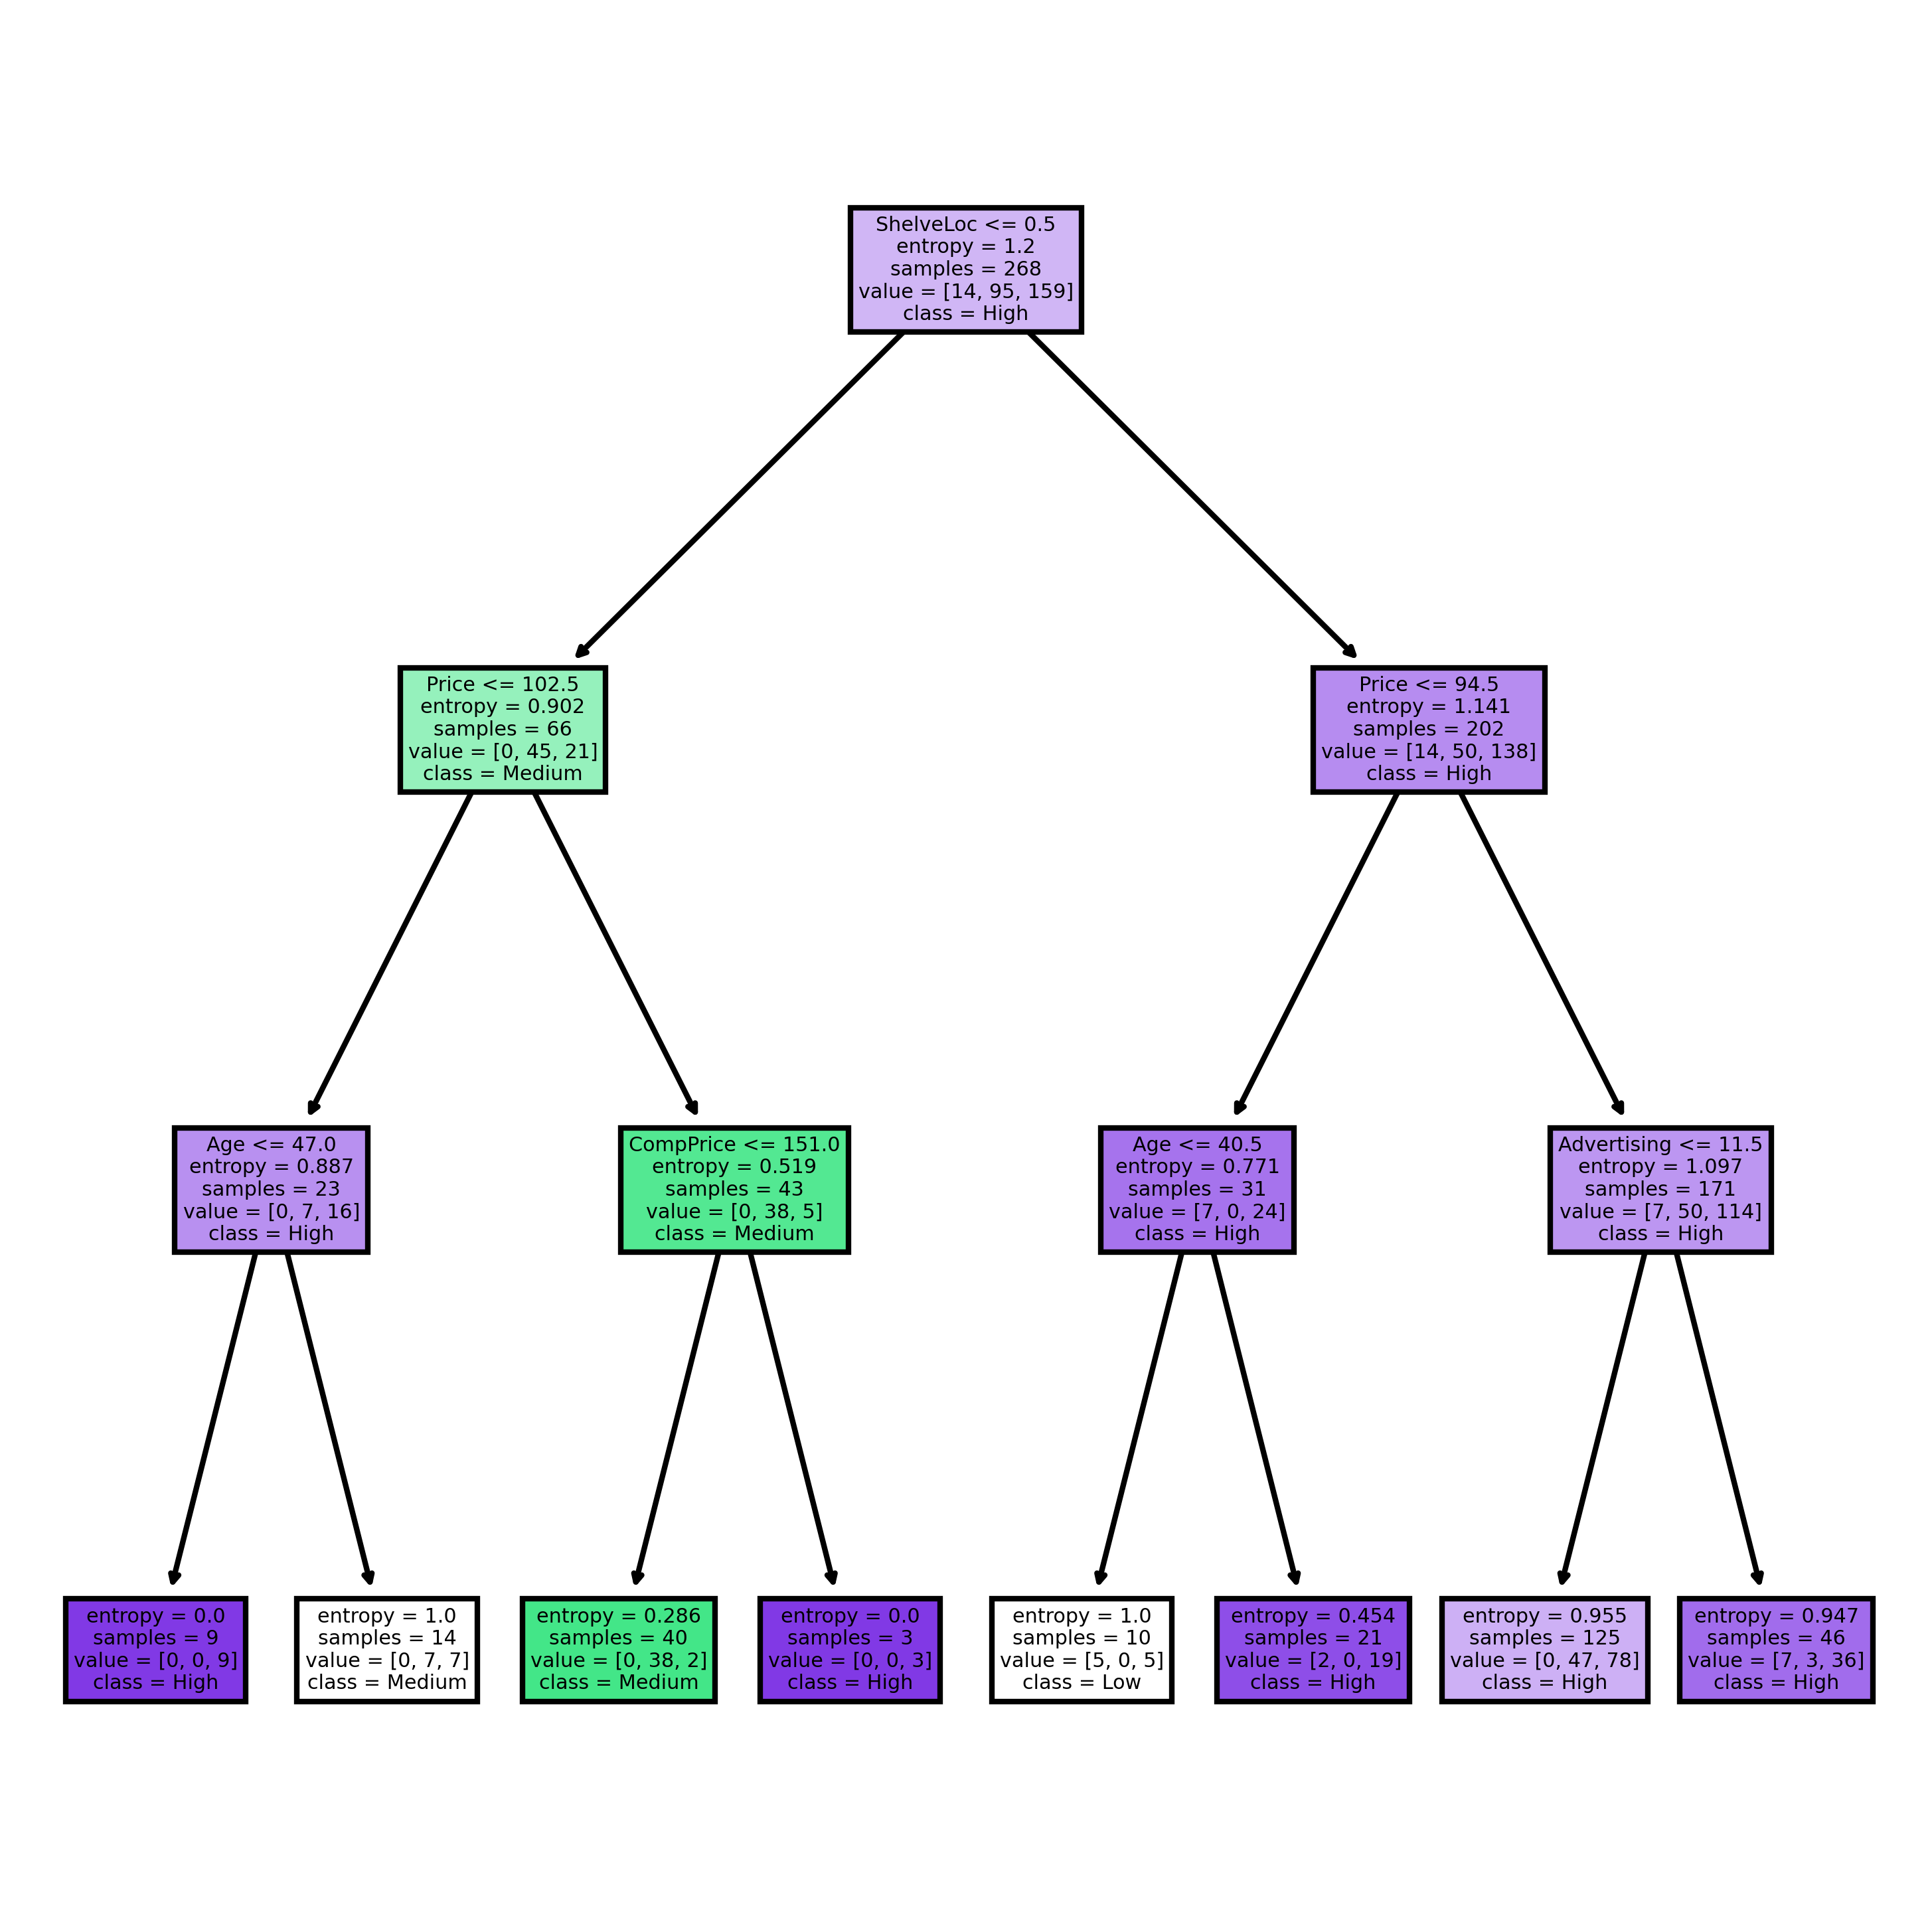

In [21]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_entropy,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [22]:
#prediction train data
pred_train_y = model_entropy.predict(x_train)

In [23]:
# Predicting company_data test data
pred_y_test = model_entropy.predict(x_test)
pred_y_test

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [24]:
pd.Series(pred_y_test).value_counts()

2    105
1     26
0      1
dtype: int64

In [25]:
# Checking accuracy of model
accuracy_score(y_test,pred_y_test)

0.6742424242424242

In [26]:
confusion_matrix(y_test,pred_y_test)

array([[ 1,  0, 12],
       [ 0, 15, 20],
       [ 0, 11, 73]], dtype=int64)

In [27]:
accuracy_score(y_train,pred_train_y)     #we take max depth=3 , so for train data accuracy is less
                                         # if we do not chose max depth then accuracy score will be 1 for train data

0.7276119402985075

In [29]:
confusion_matrix(y_train,pred_train_y)

array([[  5,   0,   9],
       [  0,  45,  50],
       [  5,   9, 145]], dtype=int64)

# Building model by Gini Criterion

In [30]:
 model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

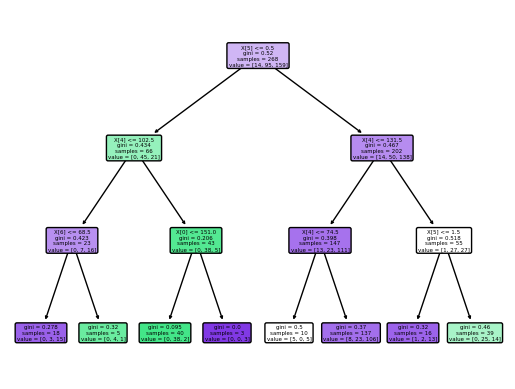

In [31]:
# Plotting Decision tree
tree.plot_tree(model_gini,filled=True, rounded=True)
plt.show()

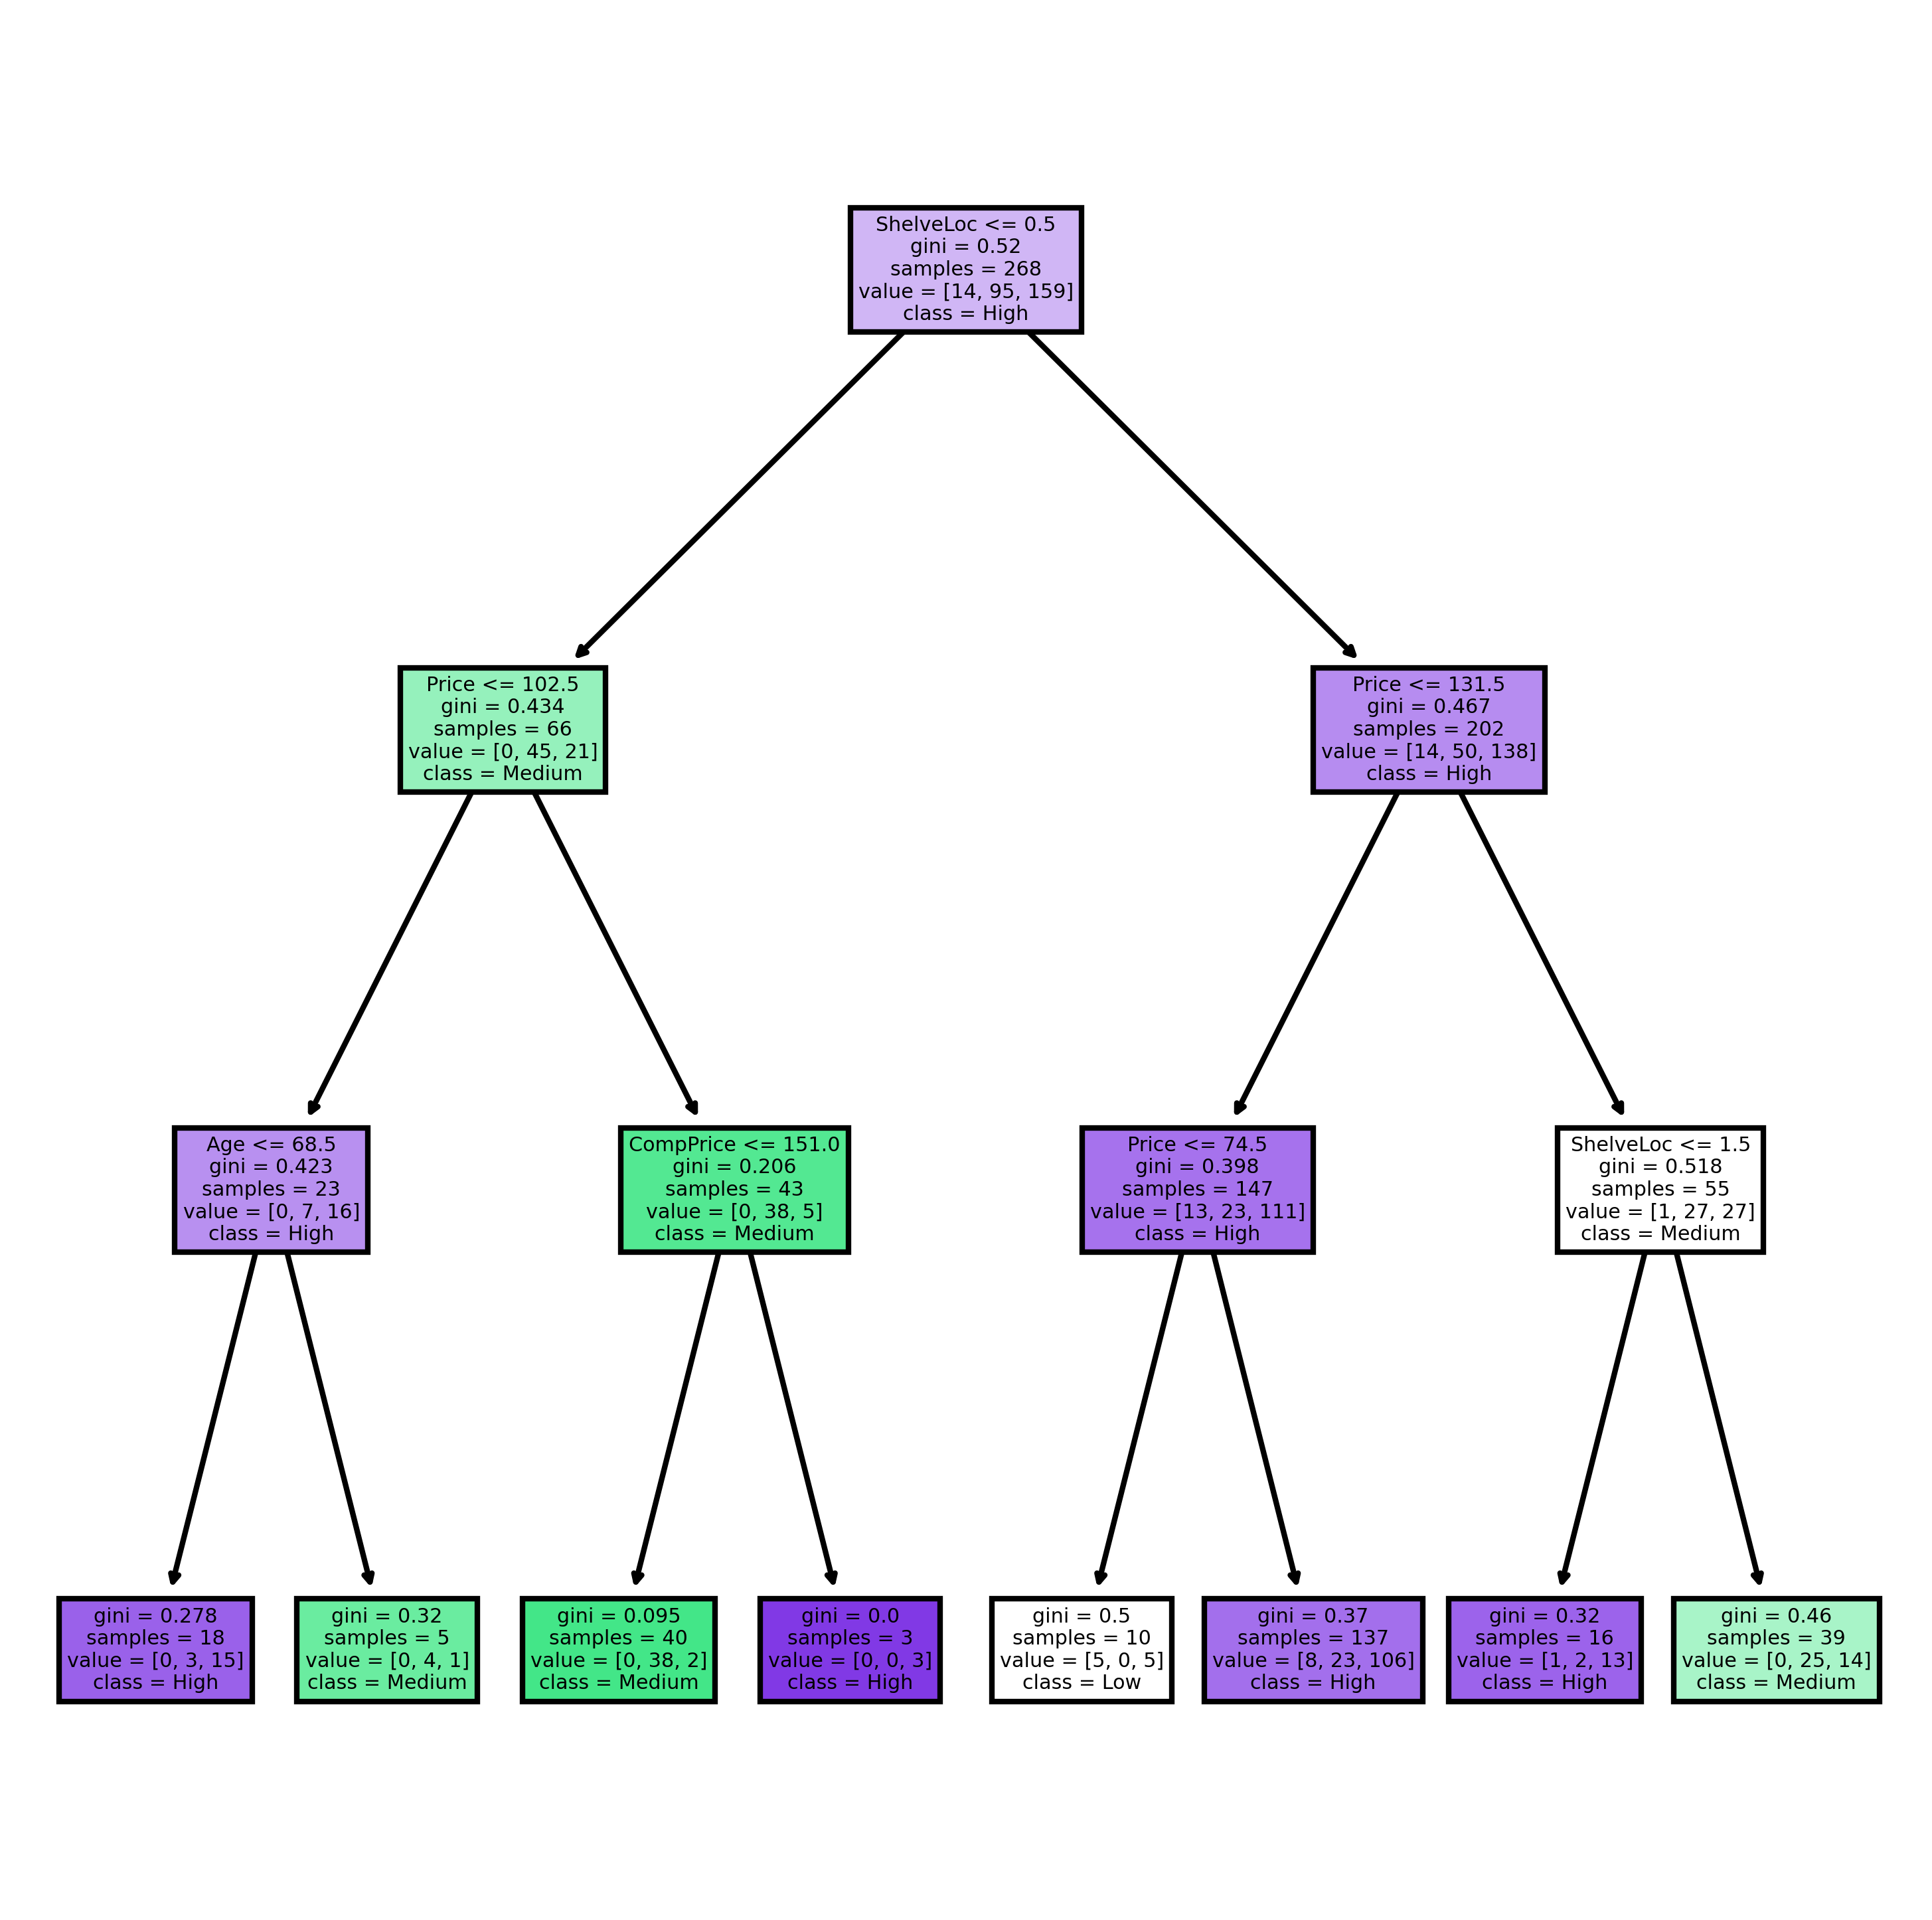

In [35]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [36]:
#prediction train data
pred_train_y_gini = model_gini.predict(x_train)

In [37]:
# Predicting company_data by gini 
pred_test_y_gini = model_gini.predict(x_test)
pred_test_y_gini

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [44]:
pd.Series(pred_test_y_gini).value_counts()

2    89
1    38
0     5
dtype: int64

In [40]:
# Checking accuracy of model
accuracy_score(y_test,pred_test_y_gini)

0.6893939393939394

In [41]:
confusion_matrix(y_test,pred_test_y_gini)

array([[ 2,  0, 11],
       [ 0, 23, 12],
       [ 3, 15, 66]], dtype=int64)

In [42]:
accuracy_score(y_train,pred_train_y_gini)    #we take max depth=3 , so for train data accuracy is less
                                             # if we do not chose max depth then accuracy score will be 1 for train data

0.7798507462686567

In [43]:
confusion_matrix(y_train,pred_train_y_gini)

array([[  5,   0,   9],
       [  0,  67,  28],
       [  5,  17, 137]], dtype=int64)

# **===============================================================================================================================**

# 2) Use decision trees to prepare a model on fraud data


# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# Data Description :

* Undergrad : person is under graduated or not
* Marital.Status : marital status of a person
* Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
* Work Experience : Work experience of an individual person
* Urban : Whether that person belongs to urban area or not

# Importing Data

In [45]:
fraud_data=pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Excelr.dataset\\Fraud_check.csv")
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [46]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [47]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [48]:
fraud_data.duplicated().sum()

0

In [49]:
fraud_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Undergrad,600,2,YES,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital.Status,600,3,Single,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taxable.Income,600.0,NaN,NaN,NaN,55208.375,26204.827597,10003.0,32871.5,55074.5,78611.75,99619.0
City.Population,600.0,NaN,NaN,NaN,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,NaN,NaN,NaN,15.558333,8.842147,0.0,8.0,15.0,24.0,30.0
Urban,600,2,YES,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
corr=fraud_data.corr()
corr

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


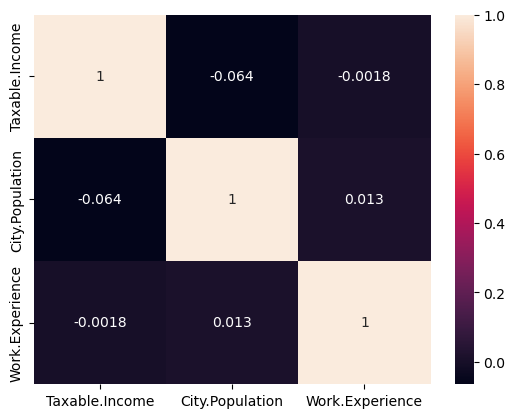

In [51]:
sns.heatmap(corr,annot=True)
plt.show()

In [52]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


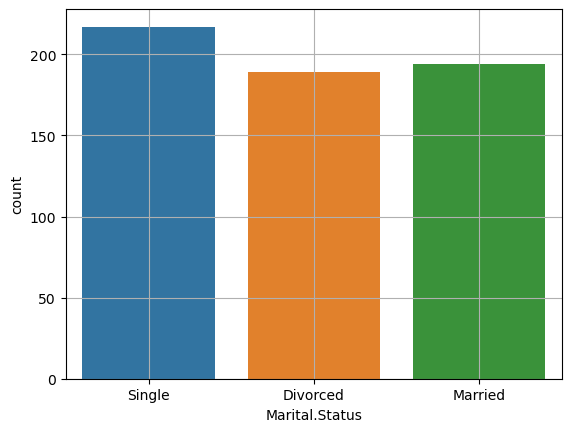

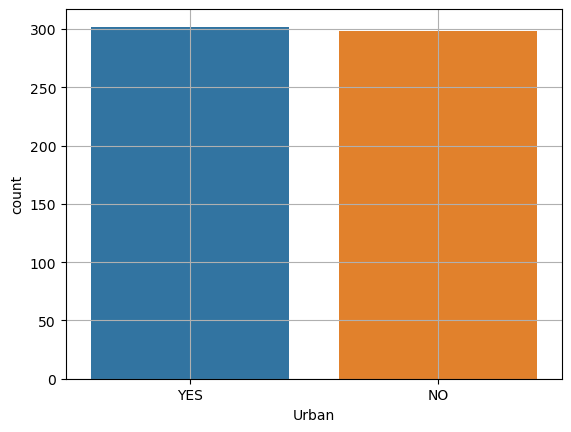

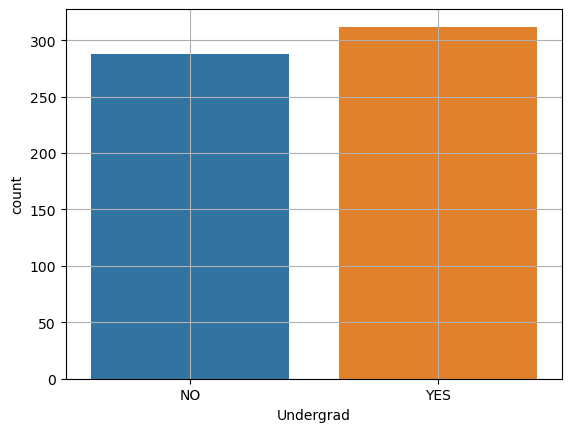

In [53]:
sns.countplot(x='Marital.Status',data=fraud_data)
plt.grid(True)
plt.show()

sns.countplot(x='Urban',data=fraud_data)
plt.grid(True)
plt.show()

sns.countplot(x='Undergrad',data=fraud_data)
plt.grid(True)
plt.show()

# Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1

In [54]:
print('minimum_value : ' , fraud_data['Taxable.Income'].min() ,'\n maximun_value :',fraud_data['Taxable.Income'].max())


minimum_value :  10003 
 maximun_value : 99619


In [55]:
#Converting Target variable 'Sales' into categories Low, Medium and High.
fraud_data['Taxable.Income'] = pd.cut(x=fraud_data['Taxable.Income'],bins = [10002,30000,99620], labels=['Risky','Good'])
fraud_data['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [56]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


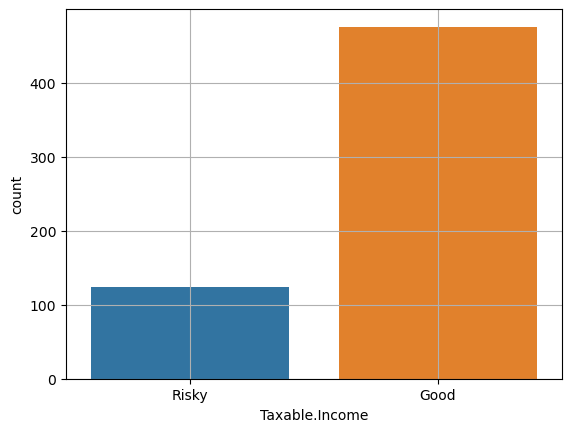

In [57]:
sns.countplot(fraud_data['Taxable.Income'])
plt.grid(True)
plt.show()

In [58]:
fraud_data['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [59]:
fraud_data = pd.get_dummies(fraud_data,columns = ["Taxable.Income"],drop_first=True)

In [61]:
fraud_data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1


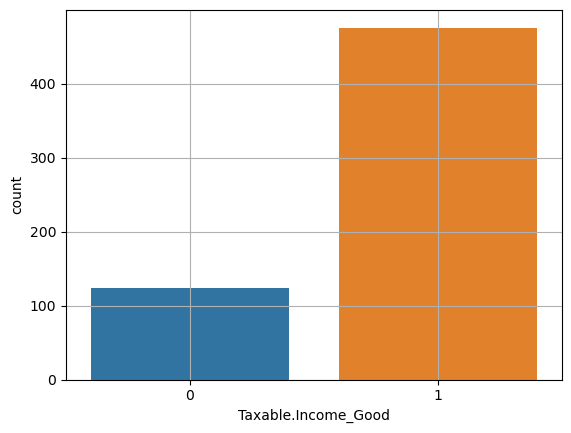

In [62]:
sns.countplot(fraud_data['Taxable.Income_Good'])
plt.grid(True)
plt.show()

In [63]:
#encoding categorical fraud_data
label_encoder = preprocessing.LabelEncoder()

fraud_data['Undergrad'] = label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Taxable.Income_Good'] = label_encoder.fit_transform(fraud_data['Taxable.Income_Good'])
fraud_data['Marital.Status'] = label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])

fraud_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [64]:
fraud_data['Taxable.Income_Good'].value_counts()

1    476
0    124
Name: Taxable.Income_Good, dtype: int64

In [65]:
X=fraud_data.drop('Taxable.Income_Good',axis=1)
y=fraud_data[['Taxable.Income_Good']]

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 12)

In [67]:
X_train.shape,y_train.shape

((402, 5), (402, 1))

In [68]:
X_test.shape,y_test.shape

((198, 5), (198, 1))

# Building Decision Tree Classifier using Entropy Criteria

In [69]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

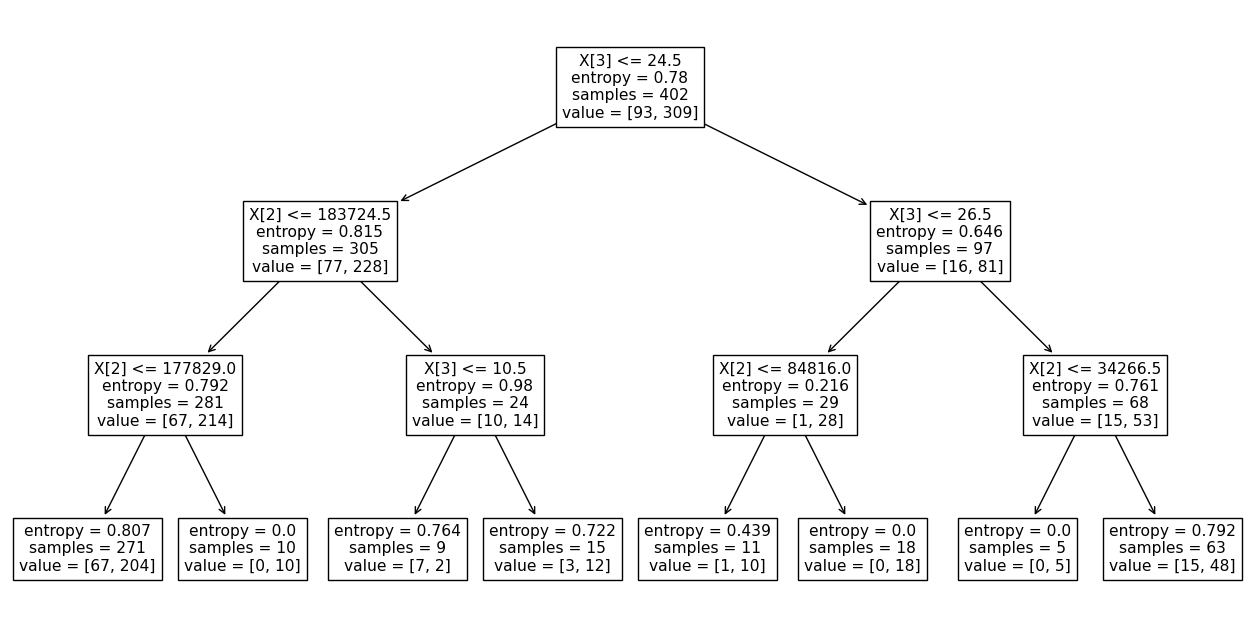

In [70]:
plt.figure(figsize=(16,8))
tree.plot_tree(dt_model)
plt.show()

In [71]:
y_pred_train = dt_model.predict(X_train)

In [72]:
y_pred_test = dt_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [73]:
accuracy_score(y_train,y_pred_train)

0.7810945273631841

In [75]:
confusion_matrix(y_train,y_pred_train)

array([[  7,  86],
       [  2, 307]], dtype=int64)

In [76]:
accuracy_score(y_test,y_pred_test)

0.8181818181818182

In [77]:
confusion_matrix(y_test,y_pred_test)

array([[  0,  31],
       [  5, 162]], dtype=int64)

# Building Decision Tree Classifier using Gini Criteria

In [78]:
dt_model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
dt_model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

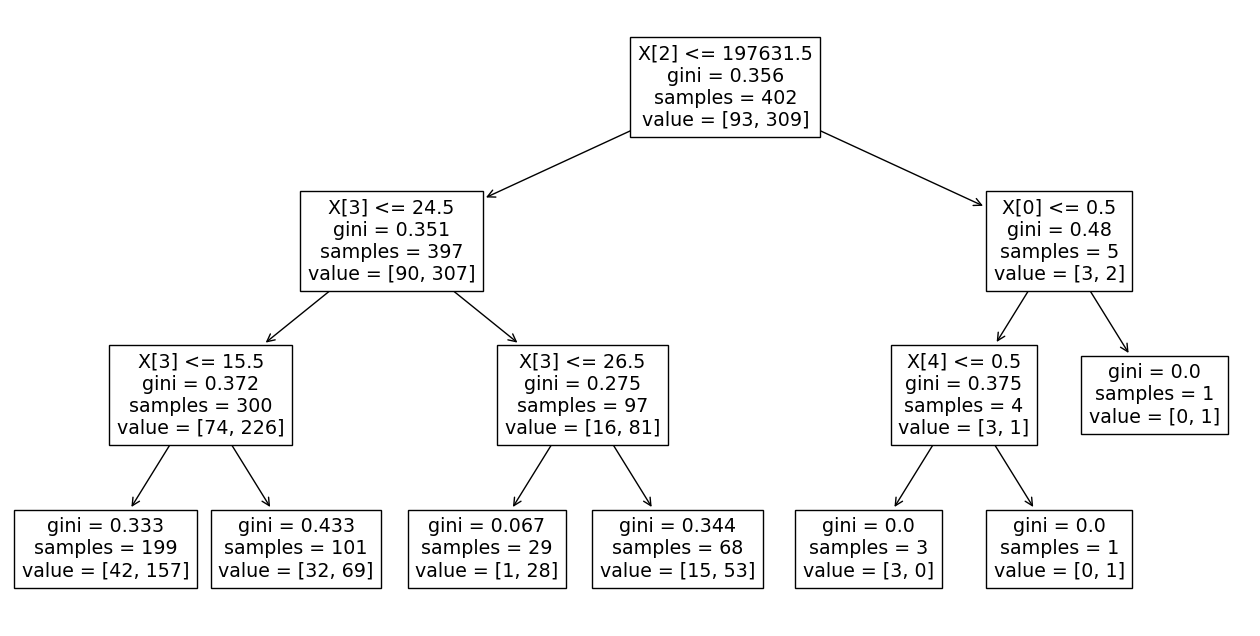

In [79]:
plt.figure(figsize=(16,8))
tree.plot_tree(dt_model_gini)
plt.show()

In [80]:
y_pred_train_g = dt_model_gini.predict(X_train)

In [81]:
y_pred_test_g = dt_model_gini.predict(X_test)
y_pred_test_g

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [82]:
accuracy_score(y_train,y_pred_train_g)

0.7761194029850746

In [83]:
confusion_matrix(y_train,y_pred_train_g)

array([[  3,  90],
       [  0, 309]], dtype=int64)

In [84]:
accuracy_score(y_test,y_pred_test_g)

0.8434343434343434

In [85]:
confusion_matrix(y_test,y_pred_test_g)

array([[  0,  31],
       [  0, 167]], dtype=int64)

# **===============================================================================================================================**